# Práctica 1: Regresión Lineal 

## Parte 1 : Regresión lineal con una variable

_**Autores: Alberto Pastor Moreno e Iván Fernández Mena**_

## 1.1 Carga de datos

En la práctica uno se va a trabajar la regresion lineal con una variable a partir de los datos almacenados en un archivo csv que se nos proporciona. Los datos extraidos estan separado en dos columnas y representan los beneficios de una compañia de distribución de comida en distintas ciudades en base a su población.

In [1]:
from pandas.io.parsers import read_csv
import numpy as np

Definimos un método que lee y carga los datos de un csv y retorna esta información recopilada. Se dicta que en el archivo no hay información de cabecera (header = None) y que los valores que son devueltos son de tipo flotantes.

In [2]:
def load_csv(filename):
    values = read_csv(filename, header=None).values
    return values.astype(float)

In [3]:
dataset = load_csv('./datasets/ex1data1.csv')

Utilizamos el conjunto de datos obtenido del csv con la función especificada previamente y separamos cada columna en vectores diferentes para poder gestionarlos de manera independiente, de este modo de puede usar cada columna para su estudio.

In [4]:
independent_data = dataset[:,0]
dependent_data = dataset[:,1]

## 1.2 Visualización simple de dataset 

A continuación se generará un plotter con los datos que previamente tratados. Se creará un plotter de cruces enfrentando los valores de beneficios de la empresa estudiada y la población que se nos ha proporvionado en el dataset.

In [17]:
import matplotlib.pyplot as plt

Text(0.5,0,'Poblacion de la ciudad en 10.000s')

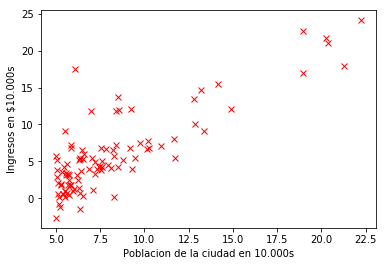

In [6]:
plt.figure()
plt.plot(independent_data, dependent_data, 'rx')
plt.ylabel('Ingresos en $10.000s')
plt.xlabel('Poblacion de la ciudad en 10.000s')

## 1.3 Método de descenso gradiente

Para encontrar la regresión lineal que más se adapte a nuestro dataset, es necesario realizar operaciones básicas de modo que en cada una de las iteraciones se obtenga un resultado más cercano al óptimo. Se necesita definir la función de coste y la función de gradiente de descenso que nos permitira obtener este resultado.

Siempre se tiene que tener en cuenta la función que se usará como hipótesis, en nuestro caso se trata de una unica variable y de una recta.

### - Implementación de la función de hipótesis de la regresión lineal 

In [7]:
def hyphotesis_function(th0, th1, x):
    return th0 + th1*x

### - Implementacion de la funcion de coste de la regresion lineal J($\theta_0$,$\theta_1$)

In [8]:
def cost_function(fun, th0, th1, m, x, y):
    sum_cost = 0
    for i in range(0, m):
        sum_cost += (fun(th0, th1, x[i]) - y[i])**2
    cost = sum_cost / (2*m)
    return cost

### - Implementación de función _gradient descent_

In [9]:
def gradient_descent(fun, th0, th1, m, x, y, lr=0.01, epochs=1500):
    cost = []
    vc_th0 = []
    vc_th1 = []
    curr_th0 = th0
    curr_th1 = th1
    for i in range(0, epochs):
        new_th0 = curr_th0 - (lr/m)*np.sum([fun(curr_th0, curr_th1, x[j]) - y[j] for j in range(0, m)])
        new_th1 = curr_th1 - (lr/m)*np.sum([((fun(curr_th0, curr_th1, x[j]) - y[j])*x[j]) for j in range(0, m)])
        curr_th0 = new_th0
        curr_th1 = new_th1
        epoch_cost = cost_function(fun, curr_th0, curr_th1, m, x, y)
        cost += [epoch_cost]
        vc_th0 += [curr_th0]
        vc_th1 += [curr_th1]
        #print('It: {}, Cost: {}'.format(i, epoch_cost))
    return curr_th0, curr_th1, cost, vc_th0, vc_th1 

A continución se muestran las variables que se han usado para la gestión de la práctica, de este modo se pueden cambiar paramentros de las pruebas de forma comoda. 

In [10]:
th0 = 0
th1 = 0
lr = 0.01
m = len(dataset)

## 1.4 Resultados obtenidos del estudio

Se aplican las funciones definidas previamente y se muestran los resultados para poder tomar unas conclusiones concretas. Se ejecuta la función de gradiente de descenso en nuestra función de hipótesis, además de toda la información necesaria gestionada y obtenida de nuestro conjunto de datos.

In [11]:
gd_th0, gd_th1, gd_cost, vc_gd_th0, vc_gd_th1 = gradient_descent(hyphotesis_function, th0, th1, m, independent_data, dependent_data, lr)
print ('th0:{}, th1:{}, cost:{}'.format(gd_th0, gd_th1, gd_cost[-1]))

th0:-3.6302914394043606, th1:1.166362350335582, cost:4.483388256587728


Como se estudia en los datos mostrados previamente y en la gráfica que se genera posteriormente, se observa que nuestro valor de coste va disminuyendo según se aplica el descenso de gradiente.

Text(0.5,0,'num_epoch')

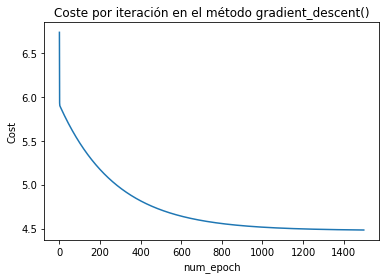

In [12]:
plt.plot(gd_cost)
plt.title('Coste por iteración en el método gradient_descent()')
plt.ylabel('Cost')
plt.xlabel('num_epoch')

Finalmente se muestra el resultado de manera coherente enfrentando los valores del dataset original y los datos obtenidos de ejecutar nuestra función gradiente sobre esos datos.

### Visualización en plotter normal

Text(0.5,0,'Poblacion de la ciudad en 10.000s')

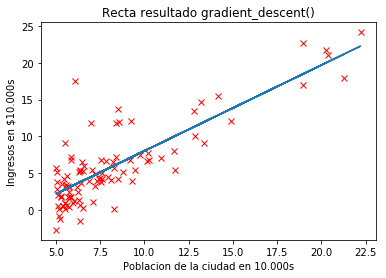

In [13]:
plt.plot(independent_data, dependent_data, 'rx', independent_data, hyphotesis_function(gd_th0, gd_th1, independent_data))
plt.title('Recta resultado gradient_descent()')
plt.ylabel('Ingresos en $10.000s')
plt.xlabel('Poblacion de la ciudad en 10.000s')

El resultado es una recta que se encuentra ajustada lo máximo posible para nuestro conjunto de datos, esta recta tiene la separación mínima entre los puntos y la resta, obtenido gracias a la función descenso de gradiente.

### Visualización en plotters 3D

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

Text(0.5,0,'Th1')

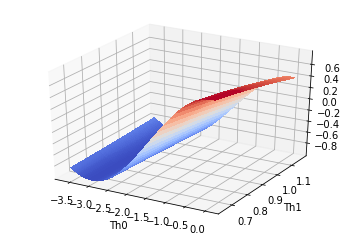

In [15]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X, Y = np.meshgrid(vc_gd_th0, vc_gd_th1)
R = np.sqrt(X**2 + Y**2)
Z = np.cos(R)

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.xlabel('Th0')
plt.ylabel('Th1')

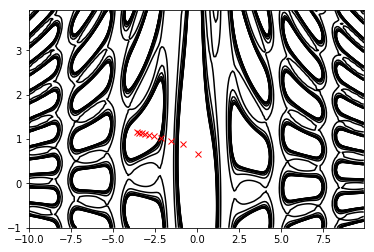

In [16]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

X = np.arange(-10, 10, 0.1)
Y = np.arange(-1, 4, 0.1)

X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

plt.contour(X, Y, Z ,np.logspace(-2, 3, 20), colors='black')
plt.plot(vc_gd_th0[::150], vc_gd_th1[::150], 'rx')

## Parte 2 : Regresión lineal con dos variables



## 2.1 Carga y normalización datos

En esta sección, realizaremos regresión lineal con múltiples variables utilizando un dataset diferente al utilizado en la sección anterior. Por ello, realizamos una nueva carga

In [3]:
dataset = load_csv('./datasets/ex1data2.csv')
nfeatures = 2
dataset[:5]

array([[2.104e+03, 3.000e+00, 3.999e+05],
       [1.600e+03, 3.000e+00, 3.299e+05],
       [2.400e+03, 3.000e+00, 3.690e+05],
       [1.416e+03, 2.000e+00, 2.320e+05],
       [3.000e+03, 4.000e+00, 5.399e+05]])

In [4]:
features = dataset[:,:nfeatures]
target = dataset[:,nfeatures]
features.shape

(47, 2)

Normalizamos los datos los datos de las variables características ya que las unidades utilizadas en el dataset utilizado varían en función al atributo en cuestión. Esto podría generar problemas por lo que sustituimos cada valor de X por su división entre su diferencia con la media de su columna y la desviación estándar de su columna, teniendo en cuenta que cada columna se corresponde con una variable característica en cuestión. 

Esto queda expresado por: $x_i \leftarrow \frac{x_i - \mu}{\sigma_i}$

In [5]:
def normalice(x):
    mu = [np.mean(x[:,i]) for i in range(0,len(x[0]))]
    sigma = [np.std(x[:,i]) for i in range(0,len(x[0]))]
    xnorm = (x - mu)/sigma
    return xnorm, mu, sigma

In [6]:
features_norm, mu, sigma = normalice(features)
ones = np.ones([len(features),len(features[0])+1])
ones[:,1:] = features_norm
features_norm = ones
features_norm[:3]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337]])

Definimos los parámetros que utilizaremos en el cálculo _gradient descent_

In [7]:
th = [1,1,1]
lr = 0.01
m = len(dataset)

## 2.2 Función hipótesis

Debido a que tenemos más de una variable característica, en este caso utilizaremos una función definida de la siguiente forma:

$ h_\theta(x)= \theta^T x$

In [8]:
hyphotesis_function = lambda th,x : np.dot(x, th)

In [9]:
hyphotesis_function(th, features_norm[0,:])

0.9053220544433592

## 2.3 Función coste

La función de coste (debajo) queda definida por la siguiente expresión:

$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^{T}(X\theta-\vec{y}) $

In [10]:
def cost_function(fun, th, m, x, y):
    cost = (x.dot(th) - y).T.dot(x.dot(th) - y)  / (2*m)
    return cost

In [11]:
cost_function(hyphotesis_function, th, m, features_norm, target)

65591047222.902596


## 2.4 _Gradient descent_

La función _gradient descent_ (debajo) actualiza los valores de $\theta_j$ _epochs_ veces siguiendo la siguiente expresión:

$\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}){x_{j}^{(i)}}$

In [12]:
def gradient_descent(fun, th, m, x, y, lr=0.01, epochs=1500):
    cost = []
    curr_th = th
    for e in range(0, epochs):        
        curr_th = curr_th - (1/m)*lr*(np.dot(x.T, fun(th, x) - y))
        epoch_cost = cost_function(fun, curr_th, m, x, y)
        cost += [epoch_cost]
        #print('It: {}, Cost: {}'.format(e + 1, epoch_cost))
    return curr_th, cost   

In [39]:
# Version dos, para probar otra manera de hacer calculos y pruebas con operaciones entre matrices
def gradient_descent_v2(fun, th, m, x, y, lr=0.01, epochs=1500):
    cost = []
    curr_th = th
    for e in range(0, epochs):        
        curr_th = curr_th - ((lr/m)*np.dot((np.dot(x, curr_th) - y), x))
        epoch_cost = cost_function(fun, curr_th, m, x, y)
        cost += [epoch_cost]
        #print('It: {}, Cost: {}'.format(e + 1, epoch_cost))
    return curr_th, cost      

In [55]:
gd_th, gd_cost = gradient_descent(hyphotesis_function, th, m, features_norm, target, lr=0.002, epochs=1500)
gd_th

array([1021235.97872342,  317288.72057683,  164122.78536599])

In [119]:
gd_th, gd_cost = gradient_descent_v2(hyphotesis_function, th, m, features_norm, target, lr=0.0002)
gd_th

It: 1, Cost: 65565038212.78998
It: 2, Cost: 65539040123.407936
It: 3, Cost: 65513052950.039185
It: 4, Cost: 65487076687.96856
It: 5, Cost: 65461111332.483
It: 6, Cost: 65435156878.87155
It: 7, Cost: 65409213322.42537
It: 8, Cost: 65383280658.43769
It: 9, Cost: 65357358882.203896
It: 10, Cost: 65331447989.02145
It: 11, Cost: 65305547974.18991
It: 12, Cost: 65279658833.01095
It: 13, Cost: 65253780560.78835
It: 14, Cost: 65227913152.82798
It: 15, Cost: 65202056604.43779
It: 16, Cost: 65176210910.92786
It: 17, Cost: 65150376067.610344
It: 18, Cost: 65124552069.79951
It: 19, Cost: 65098738912.811676
It: 20, Cost: 65072936591.96534
It: 21, Cost: 65047145102.58102
It: 22, Cost: 65021364439.98132
It: 23, Cost: 64995594599.49098
It: 24, Cost: 64969835576.43684
It: 25, Cost: 64944087366.14774
It: 26, Cost: 64918349963.95473
It: 27, Cost: 64892623365.19083
It: 28, Cost: 64866907565.19123
It: 29, Cost: 64841202559.293175
It: 30, Cost: 64815508342.835976
It: 31, Cost: 64789824911.16106
It: 32, Cost

It: 1011, Cost: 44144896081.682076
It: 1012, Cost: 44127843008.549614
It: 1013, Cost: 44110797013.87603
It: 1014, Cost: 44093758094.6474
It: 1015, Cost: 44076726247.851166
It: 1016, Cost: 44059701470.476074
It: 1017, Cost: 44042683759.512215
It: 1018, Cost: 44025673111.95099
It: 1019, Cost: 44008669524.7851
It: 1020, Cost: 43991672995.00859
It: 1021, Cost: 43974683519.61684
It: 1022, Cost: 43957701095.60649
It: 1023, Cost: 43940725719.97556
It: 1024, Cost: 43923757389.72337
It: 1025, Cost: 43906796101.85055
It: 1026, Cost: 43889841853.35903
It: 1027, Cost: 43872894641.25209
It: 1028, Cost: 43855954462.5343
It: 1029, Cost: 43839021314.21158
It: 1030, Cost: 43822095193.29111
It: 1031, Cost: 43805176096.78142
It: 1032, Cost: 43788264021.69236
It: 1033, Cost: 43771358965.035065
It: 1034, Cost: 43754460923.822
It: 1035, Cost: 43737569895.06693
It: 1036, Cost: 43720685875.78496
It: 1037, Cost: 43703808862.992455
It: 1038, Cost: 43686938853.70714
It: 1039, Cost: 43670075844.948006
It: 1040, C

array([88237.06601937, 26400.84169107, 12051.57223093])

## 2.5 _Normal Equation_

De forma alternativa a _gradient descent_, planteamos la expresión de la ecuación normal que resuelve los valores de $\theta$ siguiendo la siguiente expresión:

$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$

In [15]:
ones = np.ones([len(features),len(features[0])+1])
ones[:,1:] = features
features_wones = ones
features_t = np.transpose(features_wones)
th_norm_eq = np.dot(np.dot(np.linalg.pinv(features_t.dot(features_wones)), features_t), target)
print (th_norm_eq)

[89597.90954361   139.21067402 -8738.01911255]


### Resultados

Para comprobar que el modelo implementado utilizando _gradient descent_ es correcto, realizamos una predicción con los valores obtenidos de $\theta$ con nuestra implementación y los valores obtenidos con la ecuación normal

In [38]:
x_test = [1, 1650, 3]
x_test[1:] = (np.array(x_test[1:]) - mu ) / sigma
print('Predicción gradient descent:{}, predicción ecuación normal:{}'.format(hyphotesis_function(gd_th, x_test),
                                                                            hyphotesis_function(th_norm_eq, x_test)))

Predicción gradient descent:282272.631634852, predicción ecuación normal:91511.42364428427


Text(0.5,0,'num_epoch')

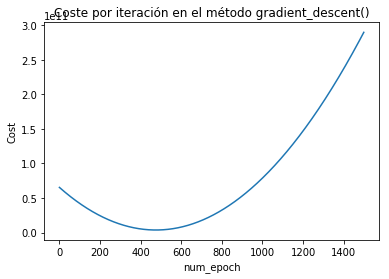

In [56]:
plt.figure()
plt.plot(gd_cost)
plt.title('Coste por iteración en el método gradient_descent()')
plt.ylabel('Cost')
plt.xlabel('num_epoch')